# NB1.2 Centrality Measures

***Samantha Castro, Christopher Cumi, Juan Fernández, and Juliana Ramayo***

In [ ]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import close
%matplotlib inline

## A. Krackhardt Kite Graph [30 pts]

In this section you will work with **Degree, Closeness and Betweeness Centrality** using Network X. The documentation about Centrality can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).
### Degree Centrality
I.  Create a NetworkX Graph of Krackhardt Kite Graph (1990):


<img src="https://drive.google.com/uc?id=1_FWvwrXF_4s4XdnP7_Eeu55BpkvSOogq" width="180"> </img>

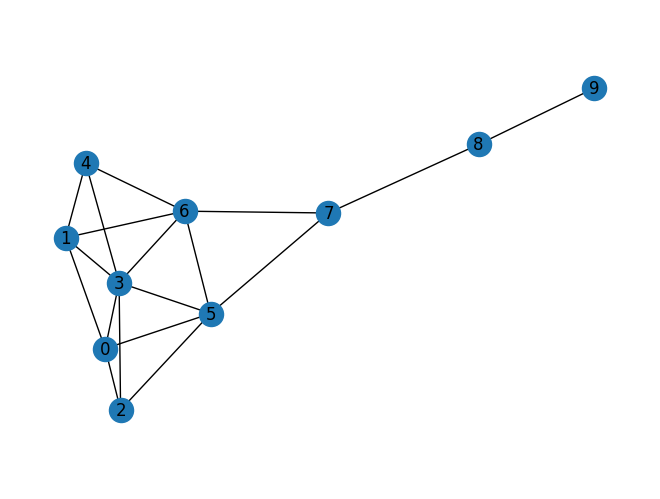

In [ ]:
# Create the Krackhardt Kite Graph
KKG = nx.krackhardt_kite_graph()

# Draw the graph
nx.draw(KKG, with_labels=True)
plt.axis('equal')
plt.show()

II. Which are the most important nodes in the Kite Graph based on the Degree Centrality?

In [ ]:
# Calculate degree centrality for each node in the graph.
degree_centrality = nx.degree_centrality(KKG)

# Print the degree centrality for each node.
print('Degree Centrality:')
for node, centrality in degree_centrality.items():
  print(f'Node {node}: {centrality:.4f}')

# Find the maximum degree centrality value to identify the most central nodes.
max_degree_centrality = max(degree_centrality.values())
# Create a list of nodes that have the maximum degree centrality.
most_important_nodes = [node for node, centrality in degree_centrality.items() if centrality == max_degree_centrality]

# Print the nodes with the highest degree centrality.
print('\nMost Important Nodes:')
for node in most_important_nodes:
  print(f'Node {node}')

Degree Centrality:
Node 0: 0.4444
Node 1: 0.4444
Node 2: 0.3333
Node 3: 0.6667
Node 4: 0.3333
Node 5: 0.5556
Node 6: 0.5556
Node 7: 0.3333
Node 8: 0.2222
Node 9: 0.1111

Most Important Nodes:
Node 3


In Directed Networks, the in-degree and out-degree can be obtained as follows:
```Python
indegC = nx.in_degree_centrality(Graph)
outdegC = nx.out_degree_centrality(Graph)
```

### Closeness Centrality
III. Recreate a NetworkX Graph and compute the Closeness Centraliy of node 1:

<img src="https://drive.google.com/uc?id=15MNM2k05dyGL--h041EeB6Xeg16G3UZj" width="180"> </img>

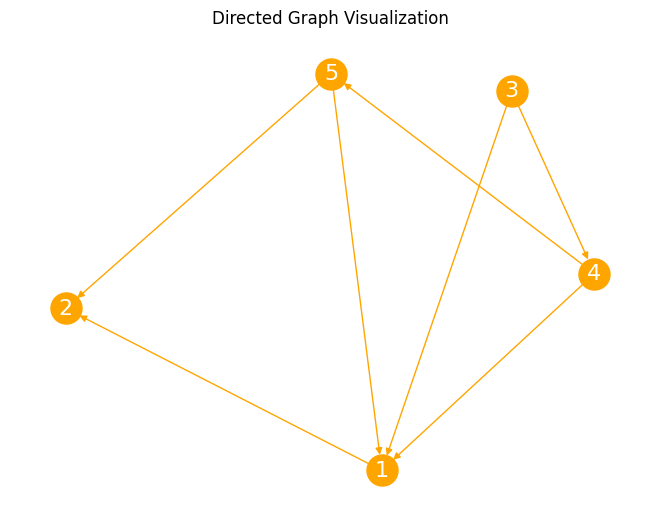

In [ ]:
# Create a directed graph
G1 = nx.DiGraph()

# Add nodes
nodes = [1, 2, 3, 4, 5]
G1.add_nodes_from(nodes)

# Add edges
edges = [(1, 2), (3, 1), (3, 4), (4, 1), (4, 5), (5, 1), (5, 2)]
G1.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G1, pos, with_labels=True, node_color='orange', edge_color='orange', node_size=500, font_size=16, font_color='white')
plt.title('Directed Graph Visualization')
plt.show()

In [ ]:
# Compute the closeness centrality for node 1
closeness_centrality_1 = nx.closeness_centrality(G1, u=1)
print(f"Closeness Centrality of node 1: {closeness_centrality_1:.4f}")

Closeness Centrality of node 1: 0.7500


IV. Which are the most important nodes in the Kite Graph based on the Closeness Centrality?

In [ ]:
# Calculate closeness centrality for all nodes of Kites Graph
closeness_centrality = nx.closeness_centrality(KKG)

# Print the closeness centrality for each node
print("Closeness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Determine the nodes with the highest closeness centrality
max_closeness = max(closeness_centrality.values())
most_important_nodes = [node for node, centrality in closeness_centrality.items() if centrality == max_closeness]

print("\nMost Important Nodes based on Closeness Centrality:")
for node in most_important_nodes:
    print(f"Node {node}")

Closeness Centrality:
Node 0: 0.5294
Node 1: 0.5294
Node 2: 0.5000
Node 3: 0.6000
Node 4: 0.5000
Node 5: 0.6429
Node 6: 0.6429
Node 7: 0.6000
Node 8: 0.4286
Node 9: 0.3103

Most Important Nodes based on Closeness Centrality:
Node 5
Node 6


### Betweeness Centrality
V. Recreate a NetworkX Graph for the following graph and find the node with the highest Betweenness Centrality:

<img src="https://drive.google.com/uc?id=1gOsVJ5EDt8FwPai4pxiDHA8zrP55MRt_" width="180"> </img>

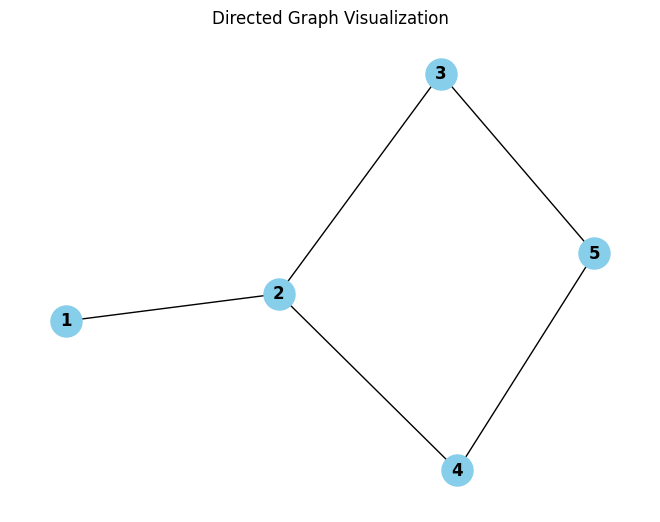

In [ ]:
# Create the graph
G2 = nx.Graph()

# Add nodes
nodes = [1, 2, 3, 4, 5]
G2.add_nodes_from(nodes)

# Add edges as shown in the image
edges = [(1, 2), (2, 3), (2, 4), (3, 5), (4, 5)]
G2.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='skyblue', edge_color='k', node_size=500, font_weight='bold', font_color='k')
plt.title('Directed Graph Visualization')
plt.show()

In [ ]:
# Compute the betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G2)

# Print the betweenness centrality for each node
print("Betweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Find the node with the highest betweenness centrality
max_centrality_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_centrality_value = betweenness_centrality[max_centrality_node]

print(f"\nNode with the highest Betweenness Centrality: Node {max_centrality_node} with {max_centrality_value:.4f}")

Betweenness Centrality:
Node 1: 0.0000
Node 2: 0.5833
Node 3: 0.1667
Node 4: 0.1667
Node 5: 0.0833

Node with the highest Betweenness Centrality: Node 2 with 0.5833


Compute $C_{btw}$ of all nodes can be very computationally expensive. Instead computing $C_{btw}$ with all pairs of nodes. It can bet approximated using a sample of nodes (k).
```Python
btwC_G = nx.betweenness_centrality(G, k = 25)
```

VI. Which are the most important nodes in the Kite Graph based on the Betweenness Centrality?

In [ ]:
# Calculate betweenness centrality for all nodes
betweenness_centrality = nx.betweenness_centrality(KKG)

# Print the betweenness centrality for each node
print("Betweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Determine the nodes with the highest betweenness centrality
max_betweenness = max(betweenness_centrality.values())
most_important_nodes = [node for node, centrality in betweenness_centrality.items() if centrality == max_betweenness]

print("\nMost Important Nodes based on Betweenness Centrality:")
for node in most_important_nodes:
    print(f"Node {node}")

Betweenness Centrality:
Node 0: 0.0231
Node 1: 0.0231
Node 2: 0.0000
Node 3: 0.1019
Node 4: 0.0000
Node 5: 0.2315
Node 6: 0.2315
Node 7: 0.3889
Node 8: 0.2222
Node 9: 0.0000

Most Important Nodes based on Betweenness Centrality:
Node 7


VII. Elaborate a Comparative Table of the most important nodes (1st, 2nd and 3rd) in the Kite Graph. In case of tie, include all nodes with the same centrality value.

In [ ]:
# Function to find top 3 nodes for a given centrality measure
def top_three_nodes(centrality):
  """
  Find the top three nodes based on a given centrality measure.

  Parameters:
  - centrality (dict): A dictionary containing the centrality values for each node.

  Returns:
  - list: A list of the top three nodes based on the centrality measure.
  """
  # Sort nodes by their centrality values in descending order
  sorted_nodes = sorted(centrality.items(), key=lambda item: item[1], reverse=True)[:3]
  # Return only the node identifiers from the sorted list
  top_nodes = [node for node, centrality in sorted_nodes]
  return top_nodes

In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(KKG)
closeness_centrality = nx.closeness_centrality(KKG)
betweenness_centrality = nx.betweenness_centrality(KKG)

# Get top nodes based on each centrality measure
top_degree = top_three_nodes(degree_centrality)
top_closeness = top_three_nodes(closeness_centrality)
top_betweenness = top_three_nodes(betweenness_centrality)

# Create a DataFrame
top = pd.DataFrame({
    'Degree Centrality': pd.Series(top_degree),
    'Closeness Centrality': pd.Series(top_closeness),
    'Betweenness Centrality': pd.Series(top_betweenness)
})

# Display the DataFrame
top

,Degree Centrality,Closeness Centrality,Betweenness Centrality
0,3,5,7
1,5,6,5
2,6,3,6


### C. Use Case:  E-mail Network [40 pts]

Consider the following E-Mail Network (Ryan A. Rossi andNesreen K. Ahmed, 2015) in a University (http://networkrepository.com/email-univ.php).

Complete the following instructions:

I. [5 pts] Compute the following Network Parameters: Number of Nodes, Number of Edges, Maximum and Minimum Degree, Average Clustering Coefficient and Transitivity.

In [ ]:
# Load the graph from the edge list file
email = nx.read_edgelist('/content/email-univ.edges', create_using=nx.Graph())

# Compute number of nodes
num_nodes = email.number_of_nodes()
# Compute number of edges
num_edges = email.number_of_edges()
# Compute minimum and maximum degree
degrees = [degree for node, degree in email.degree()]
max_degree = max(degrees)
min_degree = min(degrees)
# Compute average clustering coefficient
avg_clustering_coefficient = nx.average_clustering(email)
# Compute transitivity
transitivity = nx.transitivity(email)

# Create a table to display the network parameters
network_parameters = {
    'Number of Nodes': num_nodes,
    'Number of Edges': num_edges,
    'Maximum Degree': max_degree,
    'Minimum Degree': min_degree,
    'Average Clustering Coefficient': avg_clustering_coefficient,
    'Transitivity': transitivity
}

email_df = pd.DataFrame([network_parameters])
email_df

,Number of Nodes,Number of Edges,Maximum Degree,Minimum Degree,Average Clustering Coefficient,Transitivity
0,1133,5451,71,1,0.220176,0.16625


II. [5 pts] Consider that when a student sends an email, a communication channel is created. If we consider that the information can be exchanged both ways, is it possible to go from one student/professor to every other?

In [ ]:
# Check if the graph is connected
is_connected = nx.is_connected(email)

print(f"Is the email communication network connected? {'Yes' if is_connected else 'No'}")

Is the email communication network connected? Yes


**Given that the email communication network is connected, it is possible to go from one student or professor to every other in the network.**

**In a connected graph, a path exists between every pair of vertices, which means that each student or professor can potentially communicate with any other person in the network, either directly or indirectly through a series of email exchanges. This connectivity ensures that information can flow freely throughout the entire network, enhancing collaboration and communication among all participants, regardless of their initial point of contact or position within the network.**

III. [30 pts]Consider you want to share a Student Promotion Code in the Network and a student needs to be selected. We expect that the student who receives it will send to her friends. Based on the following restrictions which student will you choose:

(a)  The Student Promotion Code can be forwarded to multiple users at the same time but the distance is limited to one step, i.e. if the distances is more than one step, it is no longer valid.

(b) The distance limitation is removed, so the every student will receive the code eventually. Which node should be choosen if we want to ensure that it reaches the students in the lowest average number of emails?

(c) In order to disrupt the distribution, which students must be targeted to stop replying if we choose information-bridge students?

In [ ]:
# Assuming G is the already loaded graph
degree_centrality = nx.degree_centrality(email)
closeness_centrality = nx.closeness_centrality(email)
betweenness_centrality = nx.betweenness_centrality(email)

# Identify the optimal nodes based on different scenarios
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
max_betweenness_nodes = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:3]  # Top 3

print(f"Node with max degree centrality (Scenario a): {max_degree_node}")
print(f"Node with max closeness centrality (Scenario b): {max_closeness_node}")
print(f"Nodes to target to disrupt communication (Scenario c): {max_betweenness_nodes}")

Node with max degree centrality (Scenario a): 105
Node with max closeness centrality (Scenario b): 333
Nodes to target to disrupt communication (Scenario c): ['333', '105', '23']


**NOTE** An interesting use case can be found in Chapter: Centrality, Power and Bottlenecks from Social Network Analysis for Startups. Maksim Tsvetovat & Alexander Kouznetsou (2011) Social Network Analysis for Startups.

## References
Problem C. Use Case: E-mail Network is based on an exersice on Applied Social Network Analysis in Python at Coursera.